<a href="https://colab.research.google.com/github/DeepakChothe/Assignment1/blob/main/Assign_ment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_excel(r'/content/New data machine learning.xlsx')

In [3]:
data.describe()

,City,Product Category,Have you\n understood \n Product XYZ,Do you require\n additional working \ncapital or loan to \ngrow your business?,Do you think \nProduct XYZ can \nhelp your business\n to grow faster?,How much more \ngrowth (in %) Product\n XYZ can add to\n your business?,When would you\n like to register \nwith Product XYZ?
count,6136,6136,6136,6136,6012,4955,5658
unique,19,28,2,2,2,6,4
top,Pune,Pharmaceutical,Yes,Yes,Yes,No Impact,"No, Would not like to register"
freq,1499,1596,6113,3663,3368,2218,1899


In [4]:
data=data.drop(['City', 'Product Category '],axis=1)


In [5]:
data.isnull().sum()

Have you\n understood \n Product XYZ                                                 0
Do you require\n additional working \ncapital or loan to \ngrow your business?       0
Do you think \nProduct XYZ can \nhelp your business\n to grow faster?              124
How much more \ngrowth (in %) Product\n XYZ can add to\n your business?           1181
When would you\n like to register \nwith Product XYZ?                              478
dtype: int64

In [6]:
mod1=data['Do you think \nProduct XYZ can \nhelp your business\n to grow faster?'].mode()
mod=mod1[0]
data['Do you think \nProduct XYZ can \nhelp your business\n to grow faster?'].fillna(mod,inplace=True)

In [7]:
data.isnull().sum()

Have you\n understood \n Product XYZ                                                 0
Do you require\n additional working \ncapital or loan to \ngrow your business?       0
Do you think \nProduct XYZ can \nhelp your business\n to grow faster?                0
How much more \ngrowth (in %) Product\n XYZ can add to\n your business?           1181
When would you\n like to register \nwith Product XYZ?                              478
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

Have you\n understood \n Product XYZ                                              0
Do you require\n additional working \ncapital or loan to \ngrow your business?    0
Do you think \nProduct XYZ can \nhelp your business\n to grow faster?             0
How much more \ngrowth (in %) Product\n XYZ can add to\n your business?           0
When would you\n like to register \nwith Product XYZ?                             0
dtype: int64

In [10]:
Understand_product=pd.get_dummies(data['Have you\n understood \n Product XYZ'],drop_first=True)
Loan=pd.get_dummies(data['Do you require\n additional working \ncapital or loan to \ngrow your business?'],drop_first=True)
grow_faster=pd.get_dummies(data['Do you think \nProduct XYZ can \nhelp your business\n to grow faster?'],drop_first=True)
Business_growth=pd.get_dummies(data['How much more \ngrowth (in %) Product\n XYZ can add to\n your business?'],drop_first=True)

In [11]:
data_new=pd.concat([Understand_product,Loan,grow_faster,Business_growth,data['When would you\n like to register \nwith Product XYZ?']],axis='columns')

In [12]:
data_new.head()

,Yes,Yes,Yes,0.2,0.3,0.4,40% or more,No Impact,When would you\n like to register \nwith Product XYZ?
0,1,1,1,0,0,0,0,0,Within three months
1,1,1,0,0,0,0,0,0,More than 3 months
3,1,1,1,0,0,0,0,0,Within one month
5,1,1,1,0,0,0,0,0,Within three months
6,1,0,0,0,0,0,0,1,Within three months


In [13]:
x=data_new.drop(['When would you\n like to register \nwith Product XYZ?'],axis=1)
y=data["When would you\n like to register \nwith Product XYZ?"]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [16]:
model_new_svm=GridSearchCV(svm.SVC(gamma='auto'),{'C':[1,10,20,30,40,50],'kernel':['rbf','linear']},cv=5,return_train_score=False)
model_new_svm.fit(x_train,y_train)
model_new_svm.cv_results_

{'mean_fit_time': array([0.23788776, 0.09651723, 0.2437006 , 0.11541038, 0.24694424,
        0.11829729, 0.25086269, 0.1258729 , 0.25648985, 0.13587275,
        0.26189799, 0.14228001]),
 'mean_score_time': array([0.05693474, 0.02153506, 0.05291495, 0.02169681, 0.04954395,
        0.02103705, 0.05079031, 0.02198524, 0.0498332 , 0.02071352,
        0.04950709, 0.02104392]),
 'mean_test_score': array([0.60304422, 0.59325865, 0.60440698, 0.5957043 , 0.60631063,
        0.5957043 , 0.60603889, 0.5957043 , 0.60603889, 0.5957043 ,
        0.60603889, 0.5957043 ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear',
                    'rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[F

In [17]:
df=pd.DataFrame(model_new_svm.cv_results_)
tabel=df[['params','mean_test_score']]
tabel

,params,mean_test_score
0,"{'C': 1, 'kernel': 'rbf'}",0.603044
1,"{'C': 1, 'kernel': 'linear'}",0.593259
2,"{'C': 10, 'kernel': 'rbf'}",0.604407
3,"{'C': 10, 'kernel': 'linear'}",0.595704
4,"{'C': 20, 'kernel': 'rbf'}",0.606311
5,"{'C': 20, 'kernel': 'linear'}",0.595704
6,"{'C': 30, 'kernel': 'rbf'}",0.606039
7,"{'C': 30, 'kernel': 'linear'}",0.595704
8,"{'C': 40, 'kernel': 'rbf'}",0.606039
9,"{'C': 40, 'kernel': 'linear'}",0.595704


In [18]:
model_final=svm.SVC(kernel='rbf',C=1,gamma='auto')
model_final.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred=model_final.predict(x_test)

In [20]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 26,  11,   4, 138],
       [  6, 398,   3,  17],
       [  3,   3,  16, 201],
       [ 16,  66,   8, 311]])

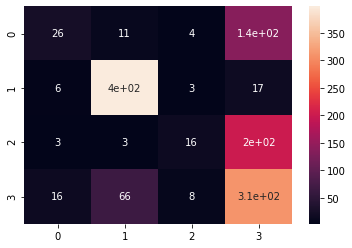

In [21]:
sns.heatmap(cm,annot=True)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                                precision    recall  f1-score   support

            More than 3 months       0.51      0.15      0.23       179
No, Would not like to register       0.83      0.94      0.88       424
              Within one month       0.52      0.07      0.13       223
           Within three months       0.47      0.78      0.58       401

                      accuracy                           0.61      1227
                     macro avg       0.58      0.48      0.45      1227
                  weighted avg       0.61      0.61      0.55      1227

